In [1]:
from plot_resitograph_data import read_nodes, read_resistograph_data, add_resistograph_data, add_scale
import matplotlib.pyplot as plt


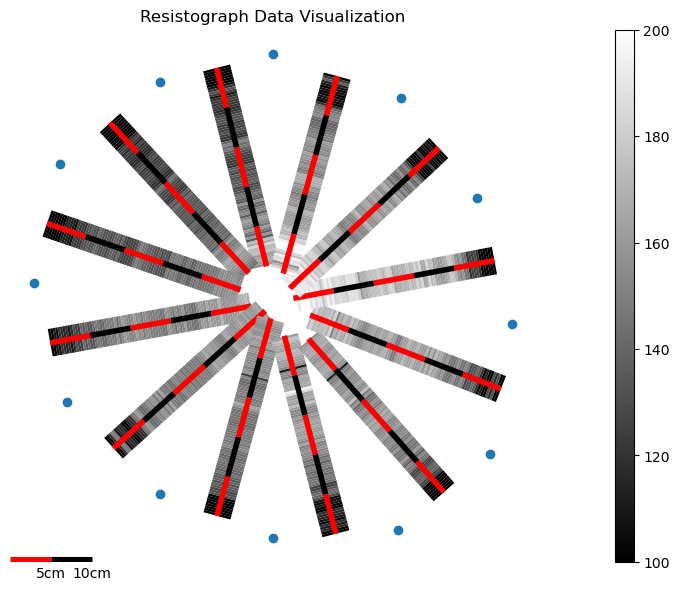

In [6]:
# Setup parameters
data_dir = "data/"
settings_filter = {
    'window_length': 201,
    'polyorder': 3,
    'upper_limit': 250
}
settings_plot = {
    'min': 100,
    'max': 200,
    'step': 300,
    'linewidth': 20,
    'cmap': 'gray'
}
meter_length = 250

# Read data
# Note: Adjust the data_dir and settings as needed for your specific use case
resistograph_df = read_resistograph_data(data_dir, **settings_filter)
nodes_df = read_nodes(data_dir)

# Plotting nodes, resistograph data, and scale
fig, [ax, cax] = plt.subplots(1, 2, figsize=(8, 6), gridspec_kw={'width_ratios': [40, 1]})
ax.plot(nodes_df['x'], nodes_df['y'], 'o')
add_resistograph_data(resistograph_df, nodes_df, ax, cax, meter_length=meter_length, **settings_plot)
add_scale(ax, meter_length)

# Final adjustments
ax.set_title('Resistograph Data Visualization')
ax.set_aspect(1)
plt.tight_layout()
plt.show()

